<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قفسه هوشمند
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این پروژه ساده شما قرار است با توجه به داده های کتابی که در اختیار دارید یک موتور پیشنهاد دهنده فیلم به کمک راهبرد UBCF بسازید که پاسخ سوالات و خواسته های مطرح شده در ادامه نوت بوک را بدهد.
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا کتابخانه های مورد نیاز و مجموعه داده <code>bookdata1.csv</code> را به نوت بوک اضافه کن.
</font>
</p>


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy

df = pd.read_csv('bookdata2.csv')


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابعاد داده ها را نمایش بده.
</font>
</p>

In [81]:
df.shape

(1149622, 4)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149622 entries, 0 to 1149621
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   User-ID  1149622 non-null  int64 
 1   ISBN     1149622 non-null  object
 2   Rating   1149622 non-null  int64 
 3   Title    1031021 non-null  object
dtypes: int64(2), object(2)
memory usage: 35.1+ MB


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از pandas تعداد داده های null در هر ستون را نمایش بده.
</font>
</p>

In [83]:
df.isnull().sum()

,0
User-ID,0
ISBN,0
Rating,0
Title,118601


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت اول
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تعداد ستون های داده های null ما بطور کلی کم است. در این مرحله تنها لازم است که سطرهای حاوی مقادیر خالی Title را حذف کنید.
</font>
</p>


In [84]:
df = df.dropna(subset=['Title'])
df.shape

(1031021, 4)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بررسی کنید اگر کاربری به یک کتاب چندین بار رای داده بود تنها یک رای آن را نگه دارید. مثلا آخرین رای را نگه دارید. و بقیه موارد را حذف کنید.
</font>
</p>


In [85]:
df = df.sort_values(by=['User-ID', 'ISBN']).drop_duplicates(subset=['User-ID', 'ISBN'], keep='last')
df.shape

(1031009, 4)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت دوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای بالاتر بردن کیفیت داده ها در سیستم های پیشنهاد دهنده، یکی از کارهایی که می توانیم بکنیم فیلتر کردن داده هاست. برای مثال در این دیتاست از شما میخواهیم که در سلول زیر کاربرانی که کمتر از 15 رای به کتاب ها داده اند را حذف کنید. و در ادامه کتاب هایی که به کمتر از 15 رای دریافت کرده اند را نیز حذف شود. این کار هم باعث کاهش ابعاد دیتاست و حجم محاسبات میشود و هم باعث میشود نویز و داده های نادر حذف شوند که البته مزایا و معایب خود را دارد.
</font>
</p>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:green"><b>راهنمایی:</b></span>
ترتیب حذف ردیف ها اهمیت دارد. همانطور که گفته شد، ابتدا کاربران را فیتلر کنید و سپس کتابها.
</font>
</p>




In [86]:
user_counts = df['User-ID'].value_counts()
book_counts = df['ISBN'].value_counts()
min_user_ratings = 15
min_book_ratings = 15


qualified_users = user_counts[user_counts >= min_user_ratings].index
qualified_books = book_counts[book_counts >= min_book_ratings].index


# ابتدا فیلتر کاربران و سپس فیلتر کتابها را اعمال کنید.
df_filtered = df[df['User-ID'].isin(qualified_users) & df['ISBN'].isin(qualified_books)]


In [87]:
df_filtered.shape

(338770, 4)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با اجرای سلول زیر، تعداد کاربران و کتابهای یکتا را خواهید دید.
</font>
</p>


In [88]:
n_users = df_filtered['User-ID'].nunique()
print(f"تعداد کاربران یکتا: {n_users}")

n_items = df_filtered['ISBN'].nunique()
print(f"تعداد کتاب‌های یکتا (آیتم‌ها): {n_items}")

تعداد کاربران یکتا: 8319
تعداد کتاب‌های یکتا (آیتم‌ها): 10392


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با اجرای دستور زیر، یک سری آمار توصیفی از تعداد رای به ازای هر کاربر خواهید دید. اینکه برای مثال میانگین هر کاربر چند رای به کتاب ها داده و...
<br>
چرا با اینکه فیلتر روی کاربران کمتر از 15 صورت گرفت همچنان رای کمتر از 15 هم داریم؟  دلیل آن این است که بعد از فیلتر رای کاربران، فیلتر کتابها هم صورت گرفت و باعث شد اگر کاربری مثلا 16 رای داده باشه با حذف کتابها، تعدادی از آرای او حذف شود و در نتیجه کمتر از 15 همچنان داشته باشیم. برای رفع این مشکل میتوان بصورت متوالی فیلترینگ انجام داد بطوری که در نهایت مقادیر معتبر و دلخواه باشند اما خب از دست دادن داده هم زیاد خواهیم داشت که فعلا از آن صرف نظر کرده و با همین داده فعلی کار را ادامه میدهیم.
</font>
</p>


In [89]:
user_rating_counts = df_filtered.groupby('User-ID')['Rating'].count()
print("آمار توصیفی تعداد رأی به ازای هر کاربر:")
print(user_rating_counts.describe())

آمار توصیفی تعداد رأی به ازای هر کاربر:
count    8319.000000
mean       40.722443
std        98.187447
min         1.000000
25%         9.000000
50%        16.000000
75%        34.000000
max      4026.000000
Name: Rating, dtype: float64


In [90]:
item_rating_counts = df_filtered.groupby('ISBN')['Rating'].count()
print("آمار توصیفی تعداد رأی به ازای هر کتاب:")
print(item_rating_counts.describe())

آمار توصیفی تعداد رأی به ازای هر کتاب:
count    10392.000000
mean        32.599115
std         38.983005
min          1.000000
25%         15.000000
50%         21.000000
75%         34.000000
max       1226.000000
Name: Rating, dtype: float64


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با اجرای دستور زیر، ده تا کتاب محبوب از لحاظ تعداد رای را ملاحظه خواهید کرد.
</font>
</p>


In [91]:
most_popular_items = item_rating_counts.sort_values(ascending=False).head(10)

df_titles = df_filtered[['ISBN', 'Title']].drop_duplicates().set_index('ISBN')
most_popular_items_with_titles = df_titles.loc[most_popular_items.index]
most_popular_items_with_titles['rating_counts'] = most_popular_items

print("\n۱۰ کتاب محبوب‌تر:")
print(most_popular_items_with_titles)
print("\n" + "="*50 + "\n")


۱۰ کتاب محبوب‌تر:
                                                      Title  rating_counts
ISBN                                                                      
0971880107                                      Wild Animus           1226
0316666343                        The Lovely Bones: A Novel            780
0385504209                                The Da Vinci Code            578
0060928336  Divine Secrets of the Ya-Ya Sisterhood: A Novel            491
0312195516              The Red Tent (Bestselling Backlist)            452
0142001740                          The Secret Life of Bees            424
067976402X                           Snow Falling on Cedars            420
044021145X                                         The Firm            417
0440214041                                The Pelican Brief            403
0671027360                                  Angels & Demons            402




In [92]:
# 10 books with the most mean rating
book_stats = df_filtered.groupby(['ISBN', 'Title'])['Rating'].agg(['mean', 'size']).reset_index()

book_stats.columns = ['ISBN', 'Title', 'rating_mean', 'rating_count']
top_10_books = book_stats.sort_values(by='rating_mean', ascending=False).head(10)

# نمایش نتیجه
top_10_books.head(10)

,ISBN,Title,rating_mean,rating_count
10388,8845247414,Il Piccolo Principe,10.000000,2
10043,1577780728,Jesus Freaks: DC Talk and The Voice of the Mar...,8.250000,8
10381,8807813823,Garzanti - Gli Elefanti: La Famiglia Winshaw,8.000000,1
9390,0836213122,There's Treasure Everywhere--A Calvin and Hobb...,7.846154,13
10240,3423205202,Mittsommermord. Roman.,7.714286,7
10177,2253140872,L'Ecume Des Jours,7.666667,9
10320,3551551685,Harry Potter und die Kammer des Schreckens,7.666667,12
7317,061815082X,"The Hobbit (Young Adult edition, Sis cover)",7.666667,9
9155,0809117541,Hope for the Flowers,7.583333,12
10367,8478886451,Harry Potter y el cÃ¡liz de fuego,7.583333,12


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با اجرای دستور زیر نمودار هیستوگرام امتیازات کاربران را خواهید دید. که فراوانی امتیازات را نشان می دهد.
</font>
</p>


<Axes: >

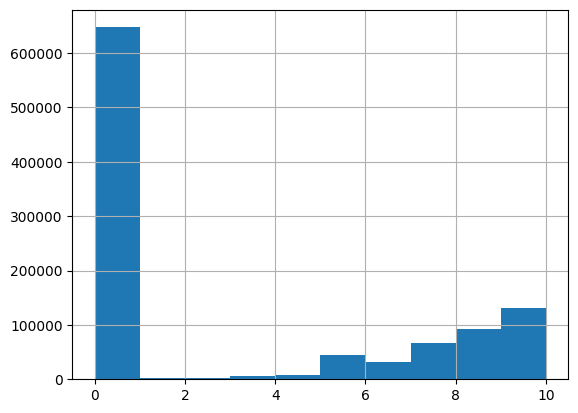

In [93]:
df['Rating'].hist()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با اجرای دستور زیر، تعداد 20 سطر از داده ها حذف میشوند که مربوط به تعاملات یا به عبارتی امتیازدهی کاربر با شماره آیدی 11676 است. این 20 سطر را در آینده بعد از ساخت ماتریس تعامل و تابع تخمین امتیاز، برای ارزیابی استفاده میکنیم.
<br>
در واقع داریم امتیازاتی که کاربر مورد نظر به 20 کتاب داده است را از داده ها حذف میکنیم.
</font>
</p>

In [94]:
user_all_data = df_filtered[df_filtered['User-ID']==11676]
print(f"تعداد کل امتیازات کاربر {11676}: {len(user_all_data)} عدد")

ratings_10 = user_all_data[user_all_data['Rating'] == 10]

num_10_to_sample = min(7, len(ratings_10))
test_samples_10 = ratings_10.sample(n=num_10_to_sample, random_state=42)

ratings_9 = user_all_data[user_all_data['Rating'] == 9]
num_9_to_sample = min(3, len(ratings_9))
test_samples_9 = ratings_9.sample(n=num_9_to_sample, random_state=42)


already_selected_indices = test_samples_10.index.union(test_samples_9.index)
remaining_data = user_all_data.drop(already_selected_indices)
num_random_to_sample = 20 - len(test_samples_10) - len(test_samples_9)
num_random_to_sample = min(num_random_to_sample, len(remaining_data))

test_samples_random = remaining_data.sample(n=num_random_to_sample, random_state=42)

df_test = pd.concat([test_samples_10, test_samples_9, test_samples_random])

df_filtered = df_filtered.drop(df_test.index)


تعداد کل امتیازات کاربر 11676: 4026 عدد


In [95]:
df_test.head(20)

,User-ID,ISBN,Rating,Title
51566,11676,0553282980,10,Dead Poets Society
47574,11676,034536676X,10,The World According to Garp
48327,11676,0380709546,10,Ramona the Pest (Ramona Quimby (Paperback))
50942,11676,0486424634,10,Books and Reading: A Book of Quotations (Dover...
52508,11676,0671534718,10,Melody (Logan)
52541,11676,0671631845,10,CYCLOPS
51759,11676,0553578693,10,The Next Accident
49773,11676,0440236053,9,Writ of Execution
46357,11676,014027927X,9,Ralph's Party
45899,11676,0061097861,9,Hunting Badger (Joe Leaphorn/Jim Chee Novels)


In [96]:
df_filtered.loc[df_filtered['User-ID'] == 242]

,User-ID,ISBN,Rating,Title
9914,242,0553278223,10,The Martian Chronicles
9915,242,0971880107,0,Wild Animus
9921,242,3257208626,8,Fahrenheit 451
9931,242,3257233051,9,Veronika Deschliesst Zu Sterben / Vernika Deci...
9942,242,3498020862,8,Die Korrekturen.


In [97]:
df_test.loc[df_test['User-ID'] == 242]

,User-ID,ISBN,Rating,Title


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت سوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از متد <code>pivot_table</code> کتابخانه <code>Pandas</code> ماتریس کاربر-آیتم خود را بسازید. ستون های این ماتریس شماره شابک کتاب های مختلف هستند که در قسمت قبل ستون آن را ساختیم. و سطر این ماتریس، آیدی کاربران است. همچنین درایه های این ماتریس شامل امتیازات داده شده کاربران به کتاب های مختلف است. در ضمن درایه هایی که مقدار ندارند یا به عبارتی کاربران رای ثبت نکرده اند را با صفر پر کنید.
</font>
</p>


In [98]:
user_item_matrix = df_filtered.pivot_table(index='User-ID', columns='ISBN', values='Rating', fill_value=0)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ماتریس کاربر-آیتم خود را نمایش دهید.
</font>
</p>


In [99]:
print(user_item_matrix.shape)
user_item_matrix.sample(5)

(8319, 10392)


ISBN,0002558122,000649840X,0006546684,0006547834,0006550576,0006550789,0007106572,0007110928,0007122039,0007141076,...,8817106100,8817106259,8817125539,8817131628,881787017X,8845205118,8845247414,884590184X,8885989403,950491036X
User-ID,,,,,,,,,,,,,,,,,,,,,
221557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
آیدی 15 کاربری که بیشترین درخواست را داده اند یعنی بیشترین کتاب را رای داده اند همراه با تعداد درخواست ها چاپ کنید.
</font>
</p>

In [100]:
top_users = df_filtered['User-ID'].value_counts().head(15)
print("آیدی 15 کاربر با بیشترین تعداد رأی:")
print(top_users)

آیدی 15 کاربر با بیشترین تعداد رأی:
User-ID
11676     4006
35859     1895
153662    1575
76352     1553
16795     1220
198711    1203
204864    1102
102967    1079
78783     1045
55492     1007
227447     955
60244      954
232131     950
230522     935
175003     897
Name: count, dtype: int64


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
شباهت سنجی
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
به قلب سیستم های پالایش جمعی رسیدیم. در این مرحله شما باید بین کاربران شباهت سنجی کنید و ماتریس کاربر-کاربر را بسازید. از آنجایی که داده های ما به شکل صریح است و مقادیر 0 تا 10 دارند، میتوانید از معیارهای شباهت سنجی مثل کسینوسی یا همبستگی پیرسون استفاده کنید. پیشنهاد ما استفاده و مقایسه هر دوی این معیارها برای مشاهده تفاوت هاست اما با توجه به حجم بالای داده ها احتمالا محاسبه شباهت پیرسون نزدیک به 1 ساعت و حتی بیشتر زمان ببرد! که این خود از معضلات UBCF است که البته در فصل های آینده چگونگی سر کردن با این چالش را خواهید آموخت. اما به هرحال در سلول زیر با استفاده از شباهت کسینوسی ماتریس کاربر-کاربر خود را بسازید. سطرها و ستون های این ماتریس آیدی کاربران است و درایه های این ماتریس میزان شباهت کاربران به یکدیگر است.
</font>
</p>



In [101]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity_cosine = cosine_similarity(user_item_matrix)

In [102]:
user_similarity_cosine.shape

(8319, 8319)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت ششم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ماتریس بدست که به شکل آرایه است را به دیتافریم تبدیل کنید.
</font>
</p>


In [103]:
user_similarity_df_cosine = pd.DataFrame(user_similarity_cosine, index=user_item_matrix.index, columns=user_item_matrix.index)
print("\nماتریس شباهت کاربر-کاربر با موفقیت محاسبه شد.")
print("شکل ماتریس شباهت:", user_similarity_df_cosine.shape)
print("نمونه‌ای از ماتریس شباهت:")
user_similarity_df_cosine.head()


ماتریس شباهت کاربر-کاربر با موفقیت محاسبه شد.
شکل ماتریس شباهت: (8319, 8319)
نمونه‌ای از ماتریس شباهت:


User-ID,8,242,243,254,383,388,408,446,487,503,...,278356,278390,278418,278535,278563,278582,278633,278637,278843,278851
User-ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0
242,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0
243,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.04026,0.0,0.00000,0.0
254,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.12438,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.06513,0.0
383,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0


In [104]:
user_similarity_df_cosine.loc[242]

,242
User-ID,
8,0.0
242,1.0
243,0.0
254,0.0
383,0.0
...,...
278582,0.0
278633,0.0
278637,0.0


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت هفتم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
به مرحله تقریبا نهایی رسیدیم؛ در این مرحله باید با توجه به ماتریس کاربر-کاربری که حالا داریم لیست پیشنهادی کتاب به کاربران ارائه دهید. پس تابع زیر را تکمیل کنید که آیدی کاربران را بگیرد و لیست 20 تایی از کتاب های پیشنهادی به کاربر مذکور به همراه امتیاز تخمینی آن را خروجی دهد. در نهایت دیتافریم خروجی باید شامل دو ستون نام کتاب و امتیاز تخمین زده شده باشد. یعنی شما باید 20 کتاب اولی که تخمین میزنید کاربر امتیاز بالایی به آنها میدهد را نمایش دهید. (انتخاب پارامتر تعداد همسایه برعهده شماست.)
</font>
</p>


<h4 align=right style="line-height:200%;font-family:vazir;color:#149C08DA">
<font face="vazir" color="#00CC0AD8">
توضیحات
</font>
</h4>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مطابق درسنامه ها، بعد از ساخت ماتریس کاربر-آیتم، شما ماتریس کاربر-کاربر را ساخته اید یعنی مشخص کرده اید که دو کاربر فرضی چقدر به یکدیگر شبیه هستند، حالا باید به کمک این ماتریس لیست پیشنهادی تولید کنید. یعنی 20، کتابی که با توجه به ماتریس شباهت ها تخمین زده میشود برای کاربر x بیشترین امتیاز را میگیرد باید به ترتیب امتیاز خروجی تابع شما باشد. برای این کار معمولا امتیاز را بصورت میانگین وزن دار همسایگان محاسبه میکنند که برای این تابع، شما تعداد همسایگان را 7 در نظر بگیرید
</font>
</p>


| book                | score |
|----------------------|------------|
| harry potter | 10       |
| Black and Blue : A Novel          | 9      |
| Shogun            | 8       |
| Inconceivable              | 7      |


In [105]:
def recommender_system(user_id, df, n_recommendations=20, user_item_matrix=user_item_matrix,
                       user_similarity_df=user_similarity_df_cosine, k_neighbors=7):
    """
    Generates book recommendations for a target user using User-Based Collaborative Filtering.

    Args:
        user_id (int): The target user's ID.
        df (pd.DataFrame): The original DataFrame (or a relevant subset) containing book titles.
        n_recommendations (int): The number of recommendations to generate.
        user_item_matrix (pd.DataFrame): The user-item interaction matrix.
        user_similarity_df (pd.DataFrame): The user-user similarity matrix.
        k_neighbors (int): The number of nearest neighbors to consider.

    Returns:
        pd.DataFrame: A DataFrame with recommended books and their estimated scores.
    """
    # Check if the user exists in the similarity matrix
    if user_id not in user_similarity_df.index:
        print(f"User ID {user_id} not found in the similarity matrix. Cannot generate recommendations.")
        return pd.DataFrame(columns=['book', 'score'])

    # Ensure df_titles is available or create it
    if 'df_titles' not in locals() or df_titles is None:
         # Assuming df_filtered is available or can be derived from user_item_matrix columns
         # For simplicity, let's use the original df to get titles, assuming it has all necessary ISBNs
         # A more robust approach would be to use df_filtered or user_item_matrix columns
         try:
             df_titles = df[['ISBN', 'Title']].drop_duplicates().set_index('ISBN')
         except KeyError:
             print("Warning: 'ISBN' or 'Title' column not found in the provided df.")
             df_titles = pd.DataFrame(columns=['Title'], index=[])


    # Get the similarity scores for the target user with all other users
    user_similarity = user_similarity_df.loc[user_id]

    # Find the k most similar users (excluding the target user themselves)
    # Sort in descending order and take the top k
    similar_users = user_similarity.sort_values(ascending=False).drop(index=user_id).head(k_neighbors)

    # Get the ratings of the similar users from the user-item matrix
    similar_users_ratings = user_item_matrix.loc[similar_users.index]

    # Get the target user's ratings to identify unrated items
    target_user_ratings = user_item_matrix.loc[user_id]
    unrated_items = target_user_ratings[target_user_ratings == 0].index

    # Filter the similar users' ratings to only include unrated items for the target user
    similar_users_unrated_items_ratings = similar_users_ratings[unrated_items]

    # Calculate the weighted average rating for each unrated item
    # Multiply similar users' ratings by their similarity scores
    weighted_ratings = similar_users_unrated_items_ratings.multiply(similar_users, axis=0)

    # Sum the weighted ratings
    sum_weighted_ratings = weighted_ratings.sum(axis=0)

    # Sum the similarities only for neighbors who rated each unrated item
    sum_similarities = pd.Series(0.0, index=unrated_items)
    for item_id in unrated_items:
        # Get users who rated this item and are also among the similar neighbors
        raters_for_item = similar_users_unrated_items_ratings[item_id][similar_users_unrated_items_ratings[item_id] != 0].index
        if not raters_for_item.empty:
             sum_similarities[item_id] = similar_users.loc[raters_for_item].sum()


    # Avoid division by zero
    estimated_scores = sum_weighted_ratings / sum_similarities
    estimated_scores = estimated_scores.replace([np.inf, -np.inf], np.nan).fillna(0) # Handle potential NaNs from division

    # Get book titles for recommended items
    recommended_items = estimated_scores.sort_values(ascending=False).head(n_recommendations)

    # Retrieve book titles using the df_titles DataFrame
    # Ensure recommended_items indices are in df_titles index
    recommended_items_with_titles = df_titles.loc[df_titles.index.intersection(recommended_items.index)].copy()
    recommended_items_with_titles['score'] = recommended_items[recommended_items_with_titles.index].values

    recommended_books_with_titles = recommended_items_with_titles.reset_index().rename(columns={'ISBN': 'bookId', 'Title': 'book'})
    recommended_books_with_titles = recommended_books_with_titles[['book', 'score']] # Ensure correct column order and names


    return recommended_books_with_titles.sort_values(by='score', ascending=False).reset_index(drop=True)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت هفت ممیز یک
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به تابعی که در مرحله قبل نوشتید، برای کاربر <code>23902</code> لیست پیشنهاد تولید کنید و با نام ستون های ذکر شده با نام <code>23902.csv</code> ذخیره کنید.
</font>
</p>


In [106]:
# Generate recommendations for user 23902
user_id_23902 = 23902
n_recommendations = 20  # As requested in the markdown cell before the function definition
k_neighbors = 7       # As suggested in the markdown cell before the function definition

recommendations_23902 = recommender_system(
    user_id=user_id_23902,
    df=df, # Pass the df here
    n_recommendations=n_recommendations,
    user_item_matrix=user_item_matrix,
    user_similarity_df=user_similarity_df_cosine,
    k_neighbors=k_neighbors
)

# Rename columns and save to CSV
recommendations_23902 = recommendations_23902.rename(columns={'book': 'book', 'score': 'score'})
recommendations_23902.to_csv('23902.csv', index=False)

print(f"Recommendations for user {user_id_23902} saved to 23902.csv")
display(recommendations_23902.head())

Recommendations for user 23902 saved to 23902.csv


,book,score
0,Farewell to Manzanar: A True Story of Japanese...,10.0
1,Blackberry Wine,10.0
2,A Walk in the Woods: Rediscovering America on ...,10.0
3,Tell No One,10.0
4,Cold Comfort Farm,10.0


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت هفت ممیز دو
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به تابعی که در مرحله قبل نوشتید، برای کاربر <code>197659</code> لیست پیشنهاد تولید کنید و با نام ستون های ذکر شده با نام <code>197659.csv</code> ذخیره کنید.
</font>
</p>


In [107]:
# Generate recommendations for user 197659
user_id_197659 = 197659
n_recommendations = 20  # As requested in the markdown cell before the function definition
k_neighbors = 7       # As suggested in the markdown cell before the function definition

recommendations_197659 = recommender_system(
    user_id=user_id_197659,
    df=df, # Pass the df here
    n_recommendations=n_recommendations,
    user_item_matrix=user_item_matrix,
    user_similarity_df=user_similarity_df_cosine,
    k_neighbors=k_neighbors
)

# Rename columns and save to CSV
recommendations_197659 = recommendations_197659.rename(columns={'book': 'book', 'score': 'score'})
recommendations_197659.to_csv('197659.csv', index=False)

print(f"Recommendations for user {user_id_197659} saved to 197659.csv")
display(recommendations_197659.head())

Recommendations for user 197659 saved to 197659.csv


,book,score
0,The Empty Chair,10.0
1,The Murder Book,10.0
2,Calvin and Hobbes,10.0
3,Weirdos From Another Planet!,10.0
4,Attack Of The Deranged Mutant Killer Snow Goons,10.0


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت هشت
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در قسمت قبل سعی کردیم برای کاربران مذکور لیست پیشنهادی طرح کنیم که مثلا اپلیکیشن کتابخوانی به آنها در صفحه پیشنهادات نمایش دهد. در این مرحله میخواهیم امتیاز تخمین بزنیم. یعنی مثلا ما کتاب هری پاتر را داریم که کاربر x به آن امتیاز نداده است و میخواهیم حدس بزنیم ایا این کاربر به دنیای هری پاتر و داستان هایش چه امتیازی میدهد. این یکی دیگر از مسائلی است که در داده های صریح سیستم های پیشنهاد دهنده میتوان مطرح کرد. حالا شما باید تابعی بنویسید که داده ها و آیدی کاربر را دریافت کند و با توجه به داده ها که لیستی از کتاب های رای داده نشده است تخمین بزند که این کاربر با توجه به تاریخچه و شباهتی که با دیگر کاربران دارد چه امتیازی به این کتاب ها میدهد.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:green"><b>راهنمایی:</b></span>
اینکه براساس چند همسایه امتیازدهی صورت گیرد برعهده شماست و میتوانید اگر نمره کمی گرفتید روی آن آزمون و تست انجام دهید. اما گاهی اوقات به این دلیل که کسی به آن کتاب که داخل داده تست رای داده است رای نداده (شروع سرد) یا... که ممکن است امتیازدهی انجام نشود و به خطا بخورید. یکی از کارهایی که میتوانید انجام دهید این است که مقدار 0 قرار دهید یا مثلا مقدار وسط امتیازدهی که 5 است یا برای روش تخصصی تر، میتوانید میانگین امتیازات داده شده توسط کاربر را قرار دهید. مثلا میبینید کاربر x میانگین امتیازهایی که به کتابها داده است 7.5 است که خب بجای مقدار امتیاز کتابی که نمیتواند امتیاز آن را تخمین بزنید قرار میدهید.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در اینجا مسئله ما شبیه یک مسئله رگرسیونی دنیای یادگیری ماشین میشود. ما امتیازات کاربران را داریم که داده هایی پیوسته و از 0 تا 10 هستند. حال باید به کمک ماتریس شباهت، سعی کنیم که تخمین بزنیم با توجه به سابقه کاربر، کاربر به فلان کتاب چه امتیازی میدهد. با این تفاوت که در الگوریتم های یادگیری ماشین ما میتوانستیم جنس داده ها، جنس الگوریتم، هایپرپارامترهای الگوریتم و... را عوض کنیم تا بالاخره به نتیجه دلخواه برسیم اما در اینجا ما صرفا یک ماتریس شباهت ساده داریم که تنها سلاح ما، مثلا تغییر معیار شباهت سنجی است و خیلی نمیتوان روی آن مانور داد و البته اگر خطای بالا یا دقت کم داشتیم باید به سمت راهبردهای پیچیده تر برویم که در فصل های آینده با آنها آشنا خواهیم شد.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:green"><b>راهنمایی:</b></span>
بهتر است تابع را طوری طراحی کنید که ورودی یک دیتافریم شامل آیدی یا شماره شابک کتاب باشد. اما از همه مهمتر ورودی تابع است که بجای دریافت یک آیدی تک، دیتافریم دریافت کند. خروجی تابع باید به شکل زیر باشد:
</font>
</p>

| bookId                | score |
|----------------------|------------|
| 122 | 10       |
| 123          | 8      |
| 124            | 9       |
| 125              | 8      |


In [108]:
def predict_rating(
    input_df,
    target_user_id,
    user_item_matrix,
    user_similarity_df,
    k_neighbors):
    """
    Predicts ratings for a list of books for a target user using User-Based Collaborative Filtering.

    Args:
        input_df (pd.DataFrame): DataFrame containing the books to predict ratings for (must have an 'ISBN' column).
        target_user_id (int): The target user's ID.
        user_item_matrix (pd.DataFrame): The user-item interaction matrix.
        user_similarity_df (pd.DataFrame): The user-user similarity matrix.
        k_neighbors (int): The number of nearest neighbors to consider.

    Returns:
        pd.DataFrame: A DataFrame with book IDs and their estimated scores.
                      Returns an empty DataFrame if the target user is not found.
    """
    # Check if the target user exists in the similarity matrix
    if target_user_id not in user_similarity_df.index:
        print(f"Target User ID {target_user_id} not found in the similarity matrix. Cannot predict ratings.")
        return pd.DataFrame(columns=['bookId', 'score'])

    # Get the similarity scores for the target user with all other users
    user_similarity = user_similarity_df.loc[target_user_id]

    # Find the k most similar users (excluding the target user themselves)
    similar_users = user_similarity.sort_values(ascending=False).drop(index=target_user_id).head(k_neighbors)

    # Get the ratings of the similar users from the user-item matrix
    similar_users_ratings = user_item_matrix.loc[similar_users.index]

    # Get the list of items to predict ratings for from the input DataFrame
    items_to_predict = input_df['ISBN'].unique()

    # Calculate the target user's average rating for fallback
    target_user_ratings_data = user_item_matrix.loc[target_user_id]
    rated_items_by_target_user = target_user_ratings_data[target_user_ratings_data != 0]
    target_user_average_rating = rated_items_by_target_user.mean()

    if pd.isna(target_user_average_rating):
        target_user_average_rating = 5.0 # Default to 5 if user has no ratings


    predicted_ratings = []

    for item_id in items_to_predict:
        # Check if the item exists in the user-item matrix columns
        if item_id not in user_item_matrix.columns:
            predicted_ratings.append({'bookId': item_id, 'score': target_user_average_rating}) # Fallback for unknown items
            continue

        # Get ratings of similar users for the current item
        item_ratings_by_neighbors = similar_users_ratings[item_id]

        # Filter out neighbors who did not rate the item or gave a 0 rating
        rated_neighbors = item_ratings_by_neighbors[item_ratings_by_neighbors != 0]

        if rated_neighbors.empty:
            # Fallback if no similar neighbors have rated this item
            predicted_ratings.append({'bookId': item_id, 'score': target_user_average_rating})
        else:
            # Calculate weighted average rating
            sum_weighted_ratings = (rated_neighbors * similar_users.loc[rated_neighbors.index]).sum()
            sum_similarities = similar_users.loc[rated_neighbors.index].sum()

            # Avoid division by zero
            if sum_similarities == 0:
                 predicted_score = target_user_average_rating # Fallback if sum of similarities is 0
            else:
                predicted_score = sum_weighted_ratings / sum_similarities

            predicted_ratings.append({'bookId': item_id, 'score': predicted_score})

    predicted_df = pd.DataFrame(predicted_ratings)
    return predicted_df.sort_values(by='score', ascending=False).reset_index(drop=True)

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ارزیابی سیستم
</font>
</h3>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دیتافریم <code>test_df</code> را در مراحل قبل ساختیم تا بتوانیم ارزیابی سیستم خود را انجام دهیم. این دیتافریم امتیازات صحیحی که کاربر به کتاب‌ها داده بود را در خود دارد. کاری که قرار است انجام دهیم این است که آیدی‌های کتاب را به سیستم بدهیم و امتیازات را تخمین بزنیم، سپس با مقایسه‌ی امتیازات تخمین‌زده‌شده و امتیازات واقعی، خطای سیستم را محاسبه می‌کنیم. تابع زیر امتیازات تخمین‌زده‌شده شما را دریافت کرده و <code>MAE</code> شما را حساب می‌کند.
<br>
معیار ارزیابی MAE قدر مطلق اختلاف مقدار پیش‌بینی‌شده با مقدار واقعی است. یعنی مقدار واقعی را از مقدار پیش‌بینی‌شده کم می‌کند و حاصل را قدر مطلق می‌گیرد. مثلاً اگر ۲۰ سطر داشته باشیم، در نهایت برای هر سطر که قدرمطلق اختلاف‌ها محاسبه شد، نتایج با یکدیگر جمع شده و بر ۲۰ تقسیم می‌شود.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
فرمول ریاضی MAE به صورت زیر تعریف می‌شود:
</font>
</p>

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} \left| \hat{y}_i - y_i \right|
$$


In [109]:
predicted_df = predict_rating(
    input_df=df_test,
    target_user_id=11676,
    user_item_matrix=user_item_matrix,
    user_similarity_df=user_similarity_df_cosine,
    k_neighbors=10
)

from sklearn.metrics import mean_absolute_error
def calculate_mae(predictions_df, actuals_df):
    merged_df = pd.merge(predictions_df, actuals_df, left_on='bookId', right_on='ISBN')

    if merged_df.empty:
        print("هیچ آیتم مشترکی برای محاسبه خطا یافت نشد.")
        return 0.0

    # محاسبه MAE بین ستون امتیاز واقعی و پیش‌بینی شده
    mae = mean_absolute_error(merged_df['Rating'], merged_df['score'])

    return mae

model_mae = calculate_mae(predicted_df, df_test)

print(f"میانگین خطای مطلق (MAE) مدل شما: {model_mae:.4f}")

میانگین خطای مطلق (MAE) مدل شما: 3.6453


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
وقتی مقیاس امتیازدهی شما بین ۰ تا ۱۰ است، مقدار MAE به سادگی نشان می‌دهد که پیش‌بینی‌های مدل به طور متوسط چند امتیاز با امتیاز واقعی که کاربر داده، اختلاف دارد؛ برای مثال MAE برابر با ۱.۵ یعنی مدل شما به طور میانگین ۱.۵ امتیاز خطا دارد. اگر این خطا در یک مدل خالص UBCF زیاد باشد، یعنی الگوریتم در پیدا کردن "همسایه‌های" مناسب یا استفاده از نظرات آن‌ها موفق نبوده است. برای بهبود آن، باید پارامترهای اصلی مدل را تنظیم کنید، مانند تغییر تعداد همسایه‌ها (k)، استفاده از معیار شباهت متفاوتی (مانند Pearson Correlation به جای Cosine) برای مقابله با مقیاس‌های مختلف امتیازدهی کاربران، و یا بهبود فیلترینگ داده‌ها برای ساخت یک ماتریس متراکم‌تر و قابل اعتمادتر.
<br>
البته برای این مسئله و این داده ها، استفاده از ubcf ساده انگاری مسئله است و بهتر است از راهبردهای پیچیده تر استفاده شود که در فصول بعد با انها اشنا میشویم.

</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای مشاهده تاثیر تعداد همسایه میتوانید پارامتر تعداد همسایگان را خیلی زیاد یا خیلی کم کنید و mae را محاسبه و پاسخ ها را با یکدیگر مقایسه کنید.
</font>
</p>

In [110]:
predicted_df = predict_rating(input_df=df_test, target_user_id=11676,
                              user_item_matrix=user_item_matrix, user_similarity_df=user_similarity_df_cosine,
                              k_neighbors=5)

model_mae = calculate_mae(predicted_df, df_test)

print(f"میانگین خطای مطلق (MAE) مدل شما: {model_mae:.4f}")

میانگین خطای مطلق (MAE) مدل شما: 3.5786


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت هشت ممیز یک
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دیتاست <code>test_158295.csv</code> را بخوانید و با توجه به آیدی کاربر که 158295 تخمین بزنید که کاربر به کتاب های موجود در لیست چه امتیازی خواهد داد. در نهایت امتیازات خود را در یک فایل csv که دارای دو ستون آیدی کتاب و امتیاز تخمین زده شده است ذخیره کنید. سیستم داوری با توجه به معیار MAE میزان خطای مدل شما را می سنجد. نام فایل خروجی خود را <code>158295.csv</code> بگذارید.
</font>
</p>


| ISBN                | score |
|----------------------|------------|
| 122 | 10       |
| 123          | 8      |
| 124            | 9       |
| 125              | 8      |


In [111]:
test_158295 = pd.read_csv("test_158295.csv")
display(test_158295.head())

,User-ID,ISBN,Rating,Title
0,158295,0380730820,0,Jupiter's Bones : A Peter Decker/Rina Lazarus ...
1,158295,0425191192,0,McNally's Alibi: An Archy McNally Novel (Archy...
2,158295,0440212189,0,Maximum Bob
3,158295,0553572202,6,Self-Defense (Alex Delaware Novels (Paperback))
4,158295,0451202287,7,Tracking Time (April Woo Suspense Novels (Pape...


In [112]:
test_158295.shape

(20, 4)

In [116]:
predicted_158295 = predict_rating(input_df=test_158295, target_user_id=158295,
                              user_item_matrix=user_item_matrix, user_similarity_df=user_similarity_df_cosine,
                              k_neighbors=5)
predicted_158295_rename = predicted_158295.rename(columns={'bookId': 'ISBN', 'score': 'score'})
predicted_158295_rename.to_csv("158295.csv", index=False)
display(predicted_158295.head())

model_mae = calculate_mae(predicted_158295, test_158295)

print(f"میانگین خطای مطلق (MAE) مدل شما: {model_mae:.4f}")

,bookId,score
0,0671673688,10.000000
1,0380730820,9.000000
2,0553572202,7.000000
3,0425191192,6.611765
4,0440212189,6.611765


میانگین خطای مطلق (MAE) مدل شما: 2.1694


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت هشت ممیز دو
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دیتاست <code>test_95359.csv</code> را بخوانید و با توجه به آیدی کاربر که 95359 تخمین بزنید که کاربر به کتاب های موجود در لیست چه امتیازی خواهد داد. در نهایت امتیازات خود را در یک فایل csv که دارای دو ستون آیدی کتاب و امتیاز تخمین زده شده است ذخیره کنید. سیستم داوری با توجه به معیار MAE میزان خطای مدل شما را می سنجد. نام فایل خروجی خود را <code>95359.csv</code> بگذارید.
</font>
</p>


In [118]:
test_95359 = pd.read_csv("test_95359.csv")
predicted_95359 = predict_rating(input_df=test_95359, target_user_id=95359,
                              user_item_matrix=user_item_matrix, user_similarity_df=user_similarity_df_cosine,
                              k_neighbors=5)
predicted_95359_rename = predicted_95359.rename(columns={'bookId': 'ISBN', 'score': 'score'})
predicted_95359_rename.to_csv("95359.csv", index=False)

model_mae = calculate_mae(predicted_95359, test_95359)

print(f"میانگین خطای مطلق (MAE) مدل شما: {model_mae:.4f}")

میانگین خطای مطلق (MAE) مدل شما: 2.4782


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [120]:
import zipfile

def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["notebook.ipynb", "23902.csv", "197659.csv", "158295.csv", "95359.csv"]
compress(file_names)

File Paths:
['notebook.ipynb', '23902.csv', '197659.csv', '158295.csv', '95359.csv']


FileNotFoundError: [Errno 2] No such file or directory: './notebook.ipynb'